In [1]:
# Import libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px


In [5]:
df = pd.read_csv('Unicorn_Companies2.csv')

In [7]:
# Display the first 10 rows of the data
df.head(5)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [8]:
# Shape of dataset

df.shape

(1074, 10)

In [13]:
# Data types and number of non-null values in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [15]:
# Descriptive statistics 
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


Data Pre Processing

In [22]:
# Create a new column "Year Joined" from "Date Joined".

df['Year Joined'] = pd.to_datetime(df["Date Joined"]).dt.year
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46


In [17]:
# Define the `str_to_num()` function
def str_to_num(x):
    x = x.strip('$B')
    x = int(x)

    return x

In [23]:
# Apply the `str_to_num()` function to the `Valuation` column
# and assign the result back to a new column called `valuation_num`

df['valuation_num'] = df['Valuation'].apply(str_to_num)
df[['Valuation', 'valuation_num']].head()

,Valuation,valuation_num
0,$180B,180
1,$100B,100
2,$100B,100
3,$95B,95
4,$46B,46


In [24]:
# Find the number of missing values in each column in this dataset.
df.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year Joined          0
valuation_num        0
dtype: int64

Review rows with missing values

In [34]:
# 1. Apply the `isna()` method to the `df_companies` dataframe and assign back to `mask`
mask = df.isna()
mask.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
1069,False,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False,False,False
1073,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
# 2. Apply the `any()` method to `mask` and assign the results back to `mask`
mask = mask.any(axis = 1)
mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [36]:
# 3. Apply `mask` as a Boolean mask to `df_companies` and assign results to `df_missing_rows`
df_missing_rows = df[mask]
df_missing_rows

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


Model Building

In [37]:
# Store the total number of values in a variable called `count_total`
count_total = df.size
count_total

12888

In [39]:
# Drop the rows containing missing values, determine number of remaining values 
count_dropna_rows = df.dropna().size
count_dropna_rows

12684

In [40]:
# Drop the columns containing missing values, determine number of remaining values
count_dropna_columns = df.dropna(axis = 1).size
count_dropna_columns

10740

In [44]:
# Print the percentage of values removed by dropping rows.

row_percent  = ((count_total - count_dropna_rows)/count_total)*100
print(f'Percentage removed, rows: {row_percent:.3f}')

Percentage removed, rows: 1.583


In [47]:
# Print the percentage of values removed by dropping columns.

col_percent = ((count_total - count_dropna_columns)/count_total)*100
print(f'Percentage removed, columns: {col_percent:.3f}')

Percentage removed, columns: 16.667


In [49]:
# 1. Fill missing values using the 'fillna()' method, back-filling
df_backfill = df.fillna(method = 'backfill')

# 2. Show the rows that previously had missing values
df_backfill.iloc[df_missing_rows.index, :]

/var/folders/65/8_9mpm955ys3m2cj2f2k6mmw0000gn/T/ipykernel_35996/3087948284.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_backfill = df.fillna(method = 'backfill')


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
12,FTX,$32B,2021-07-20,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,2019-07-22,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,2021-06-21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,2021-06-01,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


Results and Evaluation

In [50]:
# 1. Create a Boolean mask using conditional logic

cities = ['Beijing', 'San Francisco', 'London']
mask = (
    (df['Industry'] == 'Hardware') & (df['City'].isin(cities))
)|(
    (df['Industry'] == 'Artificial Intelligence') & (df['City'] == 'London') 
)

# 2. Apply the mask to the `df_companies` dataframe and assign the results to `df_invest`
df_invest = df[mask]
df_invest

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
36,Bitmain,$12B,2018-07-06,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ...",2018,12
43,Global Switch,$11B,2016-12-22,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc...",2016,11
147,Chipone,$5B,2021-12-16,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H...",2021,5
845,Density,$1B,2021-11-10,Hardware,San Francisco,United States,North America,2014,$217M,"Founders Fund, Upfront Ventures, 01 Advisors",2021,1
923,Geek+,$1B,2018-11-21,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War...",2018,1
1040,TERMINUS Technology,$1B,2018-10-25,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK",2018,1


List of countries by sum of valuation

In [55]:
# Group the data by`Country/Region`
national_valuations = df.groupby(['Country'])['valuation_num'].sum(
).sort_values(ascending=False).reset_index()
# Print the top 15 values of the DataFrame.
national_valuations.head(15)

,Country,valuation_num
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


Filter out top 4 outlying countries


In [56]:
# Remove outlying countries

national_valuations_no_big4 = national_valuations.iloc[4:, :]
national_valuations_no_big4.head()

,Country,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


BONUS : Alternative Approach

In [57]:
# (Optional) Use `isin()` to create a Boolean mask to accomplish the same task
mask = ~national_valuations['Country'].isin(['United States', 'China', 'India', 'United Kingdom'])
national_valuations_no_big4 = national_valuations[mask]
national_valuations_no_big4.head()

,Country,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


Create barplot for top 20 non-big-4 countries

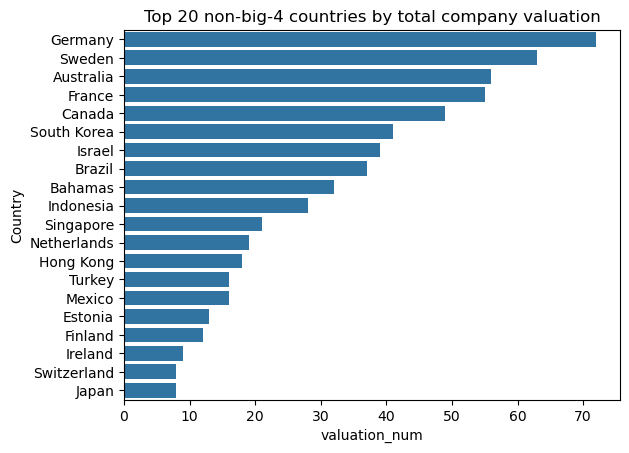

In [58]:
# Create a barplot to compare the top 20 countries with highest company valuations.

sns.barplot(data = national_valuations_no_big4.head(20),
            y = 'Country',
            x = 'valuation_num')
plt.title('Top 20 non-big-4 countries by total company valuation')
plt.show()

Plot Maps

In [61]:
# Plot the sum of valuations per country

data = national_valuations_no_big4
px.scatter_geo(data,
               locations='Country',
               size='valuation_num',
               locationmode='country names',
               color='Country',
               title='Total company valuations by country (non-big-four)')